# Assignment: Data Wrangling
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/benshults22/DS3001-SP26/refs/heads/main/wrangling/assignment/data/airbnb_hw.csv"
df = pd.read_csv(url, low_memory=False)
print(df.dtypes, '\n')
#Price is an object (not good), because values above 999 include a comma to mark the thousands
df["Price"].str.replace(",","") #Remove commas
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # Coerce the variable to numeric
print(df.dtypes, '\n') # Now Price is a float, which solves the type issue
print(df['Price'].isnull().sum()) # There are 181 missing values
# Create a missing dummy:
df['Price_na'] = df['Price'].isnull()
impute_value = df['Price'].median()
df['Price_impute'] = df['Price'].fillna(impute_value)
print(df['Price_impute'].isnull().sum()) # There are no more missing values (imputed with median) in the df Price_impute)

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                         float64
Review Scores Rating          floa

In [4]:
url2 = "https://raw.githubusercontent.com/benshults22/DS3001-SP26/refs/heads/main/wrangling/assignment/data/mn_police_use_of_force.csv"
df2 = pd.read_csv(url2, low_memory=False)
proportion_missing = df2['subject_injury'].isna().mean()
print(proportion_missing)
#Theres a whole bunch of nulls (76% of all data, which is VERY concerning), so I'm going to replace them with Unknown
df2['subject_injury'] = df2['subject_injury'].fillna("Unknown")
#Crosstab the subject_injury and force_type
pd.crosstab(df2['subject_injury'], df2['force_type'])
#Unknown (missing data) has all the Maximal restraing techniques, and disproportionate chemical irritants and tasers.


0.7619342359767892


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Unknown,2,7051,1421,0,27,74,87,0,170,31,985
Yes,2,1286,41,0,44,40,0,2,0,44,172


int64
[9 0 1] 

released
1    19154
0     3801
9       31
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 

0


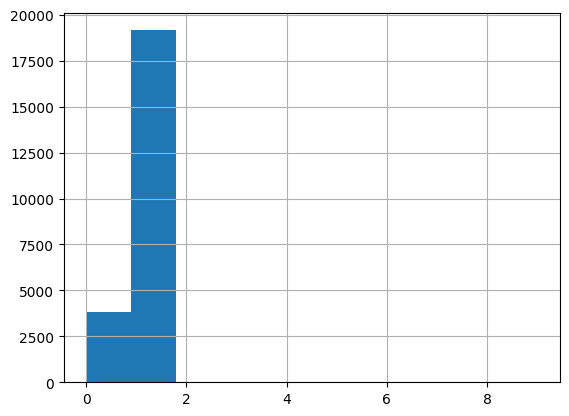

In [5]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df3 = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you
df3=df3.rename(columns = {'WhetherDefendantWasReleasedPretrial':'released'}) # Rename the variable
print(df3['released'].dtype) #released is an int
var = 'released'
print(df3[var].unique(),'\n')
print(df3[var].value_counts(), '\n')
print(df3[var].hist(), '\n')
#The value 9 appears 31 times, which makes no sense
print(df3['released'].isnull().sum()) # There are 0 missing values, but I'll replace the 9s with Null so we can keep it an int
df3['released'] = df3['released'].replace(9, np.nan)


In [6]:
df3=df3.rename(columns = {'ImposedSentenceAllChargeInContactEvent':"sentence_months"}) # Rename the variable (inferring that the variable means months to be served if found guilty on all charges)
print(df3['sentence_months'].dtype) #released is an object
var = 'sentence_months'
print(df3[var].unique(),'\n')
print(df3[var].value_counts(), '\n')
#Lots of integers, but also lots of long decimal numbers, histogram is  not useful
pd.crosstab(df3['sentence_months'], df3['SentenceTypeAllChargesAtConvictionInContactEvent'])
#All the missing data are sentence type 4 or 9
df3['sentence_months'] = pd.to_numeric(df3['sentence_months'], errors='coerce') # Coerce the variable to numeric
#Coerce to numeric

object
[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [10]:
from google.colab import files
uploaded = files.upload()

Saving GSAF5.xls to GSAF5 (2).xls


Year
2015.0    143
2017.0    141
2016.0    133
0.0       129
2011.0    128
         ... 
1738.0      1
1723.0      1
1000.0      1
77.0        1
5.0         1
Name: count, Length: 261, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 

float64
Axes(0.125,0.11;0.775x0.77) 



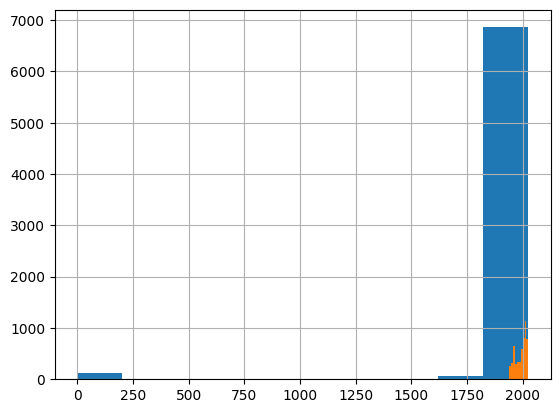

In [26]:
file_path = r"GSAF5.xls"
df = pd.read_excel(file_path)
df = df.iloc[:, :-8]
var="Year"
#print(df[var].unique(),'\n')
#Years range from 5CE to 2026, lots pf zeroes that are unkown date
print(df[var].value_counts(), '\n')
print(df[var].hist(), '\n')
print(df[var].dtype) #already a float
#I'm going to change all zeros to null because we dont know when they happened
df[var] = df[var].replace(0, np.nan)
df.head()

df_1940 = df[df[var] > 1940]
print(df_1940[var].hist(), '\n')
#Attacks are increasing since 1940 (or at least reports are)

[nan 56. 55. 24. 26. 25. 61. 40. 13. 14. 54. 48. 57.  8. 63.  9. 39. 19.
  7. 85. 69. 18. 66. 21. 37. 16. 20. 12. 42. 45. 30. 29. 35. 58. 17. 36.
 23. 28. 27. 38. 68. 33. 15. 41. 43. 49. 46. 65. 64. 11. 32. 10. 62. 22.
 52. 44. 47. 59. 50. 34. 77. 60. 73. 67.  6. 53. 51. 31. 71. 75. 70.  4.
 74.  3. 82. 72.  5. 86. 84. 87.  1. 81. 78.] 

Age
17.0    174
18.0    160
15.0    157
20.0    156
19.0    152
       ... 
72.0      1
84.0      1
86.0      1
87.0      1
81.0      1
Name: count, Length: 82, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 

float64
Axes(0.125,0.11;0.775x0.77) 



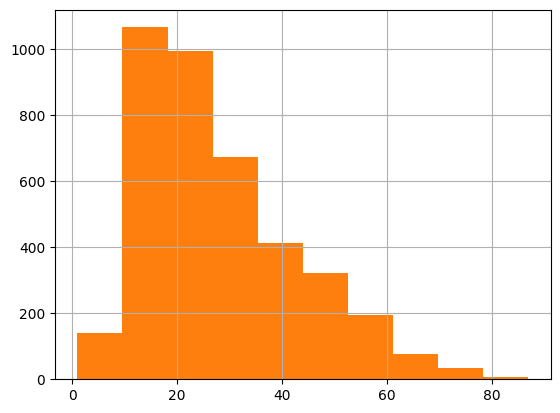

In [31]:
var="Age"
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')
print(df[var].hist(), '\n')
print(df[var].dtype) #It is an int
#Lots of ages are string descriptions or inexact
df[var] = pd.to_numeric(df[var], errors='coerce') # Coerce the variable to numeric
print(df[var].hist(), '\n')

In [33]:
var="Sex"
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')
#Summing up, there are 5673 men (5665+4+1+1+2) and 810 women (808+2), along with a number of unknowns
#Therefore, 87.506% of victims are men

['M' 'F' 'F ' 'M ' nan ' M' 'm' 'lli' 'M x 2' 'N' '.'] 

Sex
M        5665
F         808
M           4
F           2
N           2
 M          1
m           1
lli         1
M x 2       1
.           1
Name: count, dtype: int64 



In [37]:
var="Type"
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')
df[var] = df[var].replace({"Invalid": "Unknown", "Watercraft": "Unknown", "Sea Disaster": "Unknown", "Questionable": "Unknown", "Boat": "Unknown", " Provoked": "Provoked", "unprovoked": "Unprovoked", "Unconfirmed": "Unknown", "?": "Unknown", "Unverified": "Unknown", "Under investigation": "Unknown"})
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')

['Unprovoked' 'Provoked' 'Unknown' nan] 

Type
Unprovoked    5218
Unknown       1186
Provoked       643
Name: count, dtype: int64 

['Unprovoked' 'Provoked' 'Unknown' nan] 

Type
Unprovoked    5218
Unknown       1186
Provoked       643
Name: count, dtype: int64 



In [43]:
var="Fatal Y/N"
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')
df[var] = df[var].replace({"UNKNOWN": "Unknown", " N": "N", "F": "Unknown", "M": "Unknown", "Nq": "Unknown", "n": "Unknown", 2017: "Unknown", "Y x 2": "Y", "N ": "N", "y": "Y", "Uknown" : "Unknown"})
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')

['N' 'Y' 'Uknown' 'Unknown' nan] 

Fatal Y/N
N          4934
Y          1488
Unknown      77
Uknown        5
Name: count, dtype: int64 

['N' 'Y' 'Unknown' nan] 

Fatal Y/N
N          4934
Y          1488
Unknown      82
Name: count, dtype: int64 



In [47]:
pd.crosstab(df['Type'], df['Sex'])
#About as likely to attack either unprovoked (86.4% of unprovoked attacks are against men, 87.5% of all attacks are men)
pd.crosstab(df['Type'], df['Fatal Y/N'])
#Far more likely to be fatal if unprovoked (~25%) versus provoked (~3%)
pd.crosstab(df['Sex'], df['Fatal Y/N'])
#More likly to be fatal if attacking a male (~91% fatalities, ~87% of attacks)
#I think sharks are pretty cool :)

Fatal Y/N,N,Unknown,Y
Sex,,,
M,1,0,0
.,0,0,1
F,613,5,125
F,2,0,0
M,3952,46,1252
M,3,0,1
M x 2,0,0,1
N,1,0,1
lli,1,0,0


In [54]:
var="Species "
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')
#1736 total rows with values (not blank)
df_white = df[df[var].str.contains("White", case=False, na=False)]
print(df_white[var].value_counts(), '\n')
#366 contain "white/Whie/WHITE"
#21.08% of attacks appear to be white sharks

['Unknown' 'Unknown ' 'Great White Shark' ... "12' tiger shark"
 'Blue pointers'
 'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'] 

Species 
White shark                                                                     194
Shark involvement prior to death was not confirmed                              105
Invalid                                                                         102
Shark involvement not confirmed                                                  92
Tiger shark                                                                      89
                                                                               ... 
2 m [6.75'] shark, 200-kg shark T                                                 1
14' to 16' white shark                                                            1
Caribbean reef sharks                                                             1
Tiger shark, less than

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. It's about the process of making data cleaning easy through data tidying (organizing/standardizing)
2. TDS "has been designed to facilitate initial exploration and analysis of data, and to simplify the development of DS tools that work well together"
3. The first sentence means that every dataset will have issues, and that each set's issues will be different than anothers. The second means that its often hard to figure out what in the world an obervation value might mean, or even what the variable is trying to measure/represent
4. A value is a number or string, a variable contains all values that measure the same underlying attribute across units, and an observation contains all values measured on the same unit across all variables/attributes.
5. It is a way of mapping the meaning of a dataset to its structure. Each variable must form a column, each observation a row, and each type of observational unit a table.
6. Issues are columns are values (not vars), multiple vars are stored in a column, vars are stored in both rows and columns, multiple obervational units are stored in one table, and a single observational unit is stored in multiple tables. THe table is messy because the vars and obs are switched and must be fixed (rows become columns, increasing the number of rows. this is called melting)
7. The chicken/egg issue is that tidy data tools inextricably become linked to tidy data itself, which makes it hard to improve. He hopes we can be headstrong in trying to improve and explore other data structures.



**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?